In [1]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Simulate brownian motion in 1-d starting from a low entropy condition (all points start at x=1)
#.  Result should be an approximately uniform distribution
#
#.  Purpose is to demonstrate how we can split a simulation into multiple independent branches


FLAG_DATA  = 'MyResults'     # File name header to identify only simulation data files (nothing else should start with this string)
PATH_OUT   = 'out'           # Directory to save the output

# Make sure the output directory exists
if not os.path.exists(PATH_OUT):
    os.mkdir(PATH_OUT)


def clear_output():
    '''When we need to clear the test area and restart'''
    files = glob(os.path.join(PATH_OUT, '*'))
    for f in files:
        os.remove(f)
    return

def time_stamp():
    return str(dt.now()).replace(' ', '-').replace(':', '-').replace('.', '-')

def get_recent_files():
    '''Get the most recently used files (judged by how long the sequence of seeds in the filename is)'''
    f = np.array(get_files())
    counts = np.array([fi.count('.') for fi in f])
    idx = counts == counts.max()
    return list(f[idx])
    
def get_files():
    pattern = os.path.join(PATH_OUT, FLAG_DATA + '*')
    files = glob(pattern)
    return files

def save(data, cur_seed, seed_filename=None):
    '''Inputs are:
            seed_filename: The filename we started with. If None, it will be created (for the initial run)
            data: The current array we are saving
            cur_seed: The random seed used to arrive at these results
    '''
    
    if seed_filename is not None:
        # Get the random seed history from the filename
        seed_hist = seed_filename.split('_')[1]
        # Append the current seed to the seed history
        seed_hist = seed_hist + '.' + str(cur_seed)
    else:
        seed_hist = str(cur_seed)

    # Build the new filename
    file_name = FLAG_DATA + '_' + seed_hist + '_' + time_stamp()
    
    file_name = os.path.join(PATH_OUT, file_name)
    np.savetxt(file_name, data)
    return

def load(file_name):
    # Load the file
    data = np.loadtxt(file_name)
    
    return data

def init(N=100, data=None):
    '''data should either be None, or the path to a previously created output'''
    if data is None:
        data = np.ones(shape=N)
    else:
        # Load the data from the existing file
        data = load(data)
    return data

def move(data, std_dev=0.1):
    data += np.random.normal(scale=std_dev, size=data.shape)
    data %= 1 # Keep the points in the interval [0,1]
    return

def run_branch(data, seed, steps=10, seed_filename=None):
    '''Run a simulation branch and save the output'''
    np.random.seed(seed) 
    for _ in range(steps):
        move(data)
    save(data, seed, seed_filename)
    return

In [2]:
# Clear any old files and do the first run
clear_output()
data = init()
seed = 1
run_branch(data, seed)

In [3]:
# Now we have a single output file. 

# Starting with this file, launch two processes in parallel with different seeds


### FROM HERE UP UNTIL THE PLOTS, THIS IS THE PART YOU WOULD DO MANUALLY BY LAUNCHING EACH RUN IN DIFFERENT TERMINALS

### IT IS POSSIBLE TO WRITE A SCRIPT TO WRITE SCRIPTS FOR YOU!  You should notice the repetition in the code in the next few cells,
### which is always a clear sign that something is automatable.
### 
###  Note that Python does not support true parallelism though.  On Mac/Linux, you can launch several bash (.sh) scripts in parallel
###  using the & sign between them. I don't know the equivalent on Windows, and don't have a Windows machine at home to test from,
###  but I have a feeling it exists.  You might google (or ask ChatGPT) how to launch processes in parallel on windows.


# First file
f = get_recent_files()[0]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)


# Second file
seed+=1
run_branch(data,seed, seed_filename=f)

In [4]:
# Next run
# There's now 2 files to start with, and we want to do 2 more branches from each
fs = get_recent_files()


# First file
f = fs[0]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data,seed, seed_filename=f)


# Second file
f = fs[1]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data,seed, seed_filename=f)

In [5]:
# Next run
# There's now 4 files to start with, and we want to do 2 more branches from each
fs = get_recent_files()


# First file
f = fs[0]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data,seed, seed_filename=f)


# Second file
f = fs[1]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data,seed, seed_filename=f)


# Third file
f = fs[2]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data, seed, seed_filename=f)


# Fourth file
f = fs[3]
seed+=1
data = init(data=f)
run_branch(data, seed, seed_filename=f)

seed+=1
run_branch(data, seed, seed_filename=f)

In [6]:
# Now there should be 8 recent files
fs = get_recent_files()
print(len(fs))
print(fs)

8
['out/MyResults_1.2.7.8_2023-02-16-11-21-56-270831', 'out/MyResults_1.2.7.9_2023-02-16-11-21-56-272180', 'out/MyResults_1.2.6.10_2023-02-16-11-21-56-273844', 'out/MyResults_1.3.4.12_2023-02-16-11-21-56-279968', 'out/MyResults_1.3.5.14_2023-02-16-11-21-56-282797', 'out/MyResults_1.3.4.13_2023-02-16-11-21-56-281017', 'out/MyResults_1.2.6.11_2023-02-16-11-21-56-278267', 'out/MyResults_1.3.5.15_2023-02-16-11-21-56-283918']


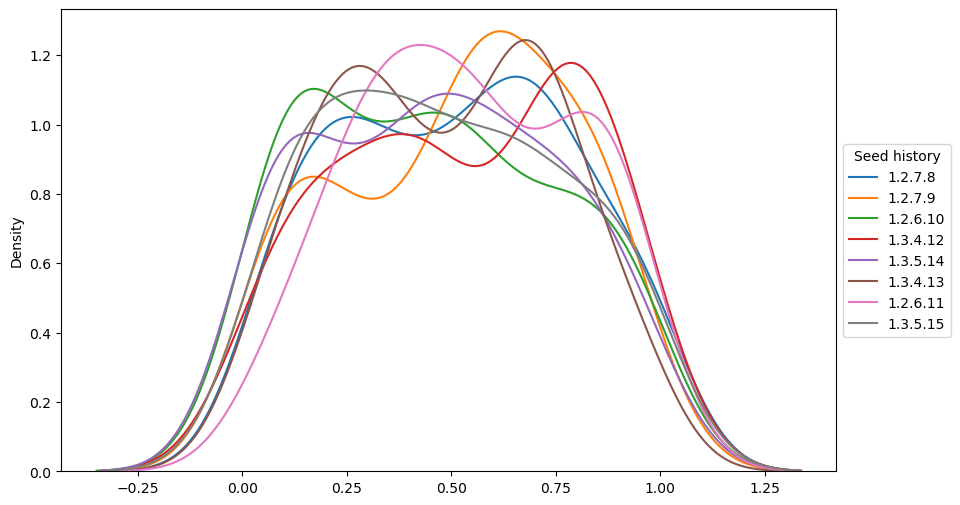

In [7]:
# Now let's analyze the distributions from our final files

# For this simple simulation, the hypothesis is that the points should end up being approximately uniformly distributed on [0, 1], 
# and the individual files should not be correlated with each other.

# All data in one array (for the correlation analysis after this)
all_data = []

plt.figure(figsize=(10,6))
for f in fs:
    data = np.loadtxt(f)
    all_data.append(data)
    sns.kdeplot(data, label=f.split('_')[1])
plt.legend(loc='center left', bbox_to_anchor=[1, 0.5], title='Seed history')
plt.show()

In [8]:
# Flatten the array and check that distribution


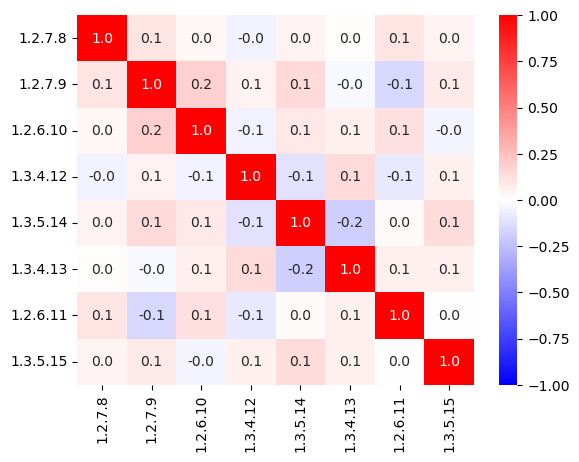

In [8]:
# Are the different files correlated? They shouldn't be!

all_data = np.array(all_data).T # Transpose the array, it's in the wrong orientation at first
df = pd.DataFrame(all_data, columns = [f.split('_')[1] for f in fs]) # DataFrame it so seaborn likes it for the heatmap
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.1f')
plt.show()